In [1]:
#[기본] 강의록 코드 
#[학습] 함수 및 패키지에 대한 한 줄 정리 및 주석
#[응용] 강의록 코드와 다르게 해결한 코드 또는 다른 dataset에 적용

### Feature Engineering; feature개수 줄이기

#### 독립변수 ⇒(인과관계, 단방향)⇒ 종속변수

#### -독립(입력)변수: feature, attribute, observation
#### -종속(반응)변수: target, class, label

#### *인과관계 = 상관관계(=공변성,양방향) + 선후관계(선 독립, 후 종속변수) + 비허위적관계(타 변수 개입X)*

#### ㉠ Feature Extraction: feature 변형; 저차원으로의 사영

In [2]:
from sklearn import datasets
wine= datasets.load_wine()
#seaborn이 아닌, sklearn에서 dataset!
#따라서 dataframe이 아닌, class(data, target)로 출력됨

In [3]:
X = wine.data #.data =feature
y = wine.target #.target =target
target_names = list(wine.target_names) #.target_names: target값 종류파악

print(f'{X.shape = }, {y.shape = }') # 150개 데이터, 4 features
print(f'{target_names = }')  

X.shape = (178, 13), y.shape = (178,)
target_names = ['class_0', 'class_1', 'class_2']


#### ㉠-1. PCA(Principal Component Analysis, 주성분분석)
#### : [비지도] 독립변수의 분산을 최대화하면서 서로 직교하는 축 만들기

In [4]:
#데이터의 '스케일'에 따라 '설명가능한 분산량'이 달라질 수 있기 때문에
#표준화를 먼저 해줘야한다!!
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

# PCA의 객체를 생성, k차원으로 설정(현재는 4차원)
pca = PCA(n_components=2) # n_components = k; feature k개로 축소


# PCA는 y값이 필요 없는 '비지도 학습'
pca_fitted = pca.fit(X)

print(f'{pca_fitted.components_ = }')  # 주성분 벡터: .components_ 
 #; array k개 中 i번째 성분 = x_i의 계수
print(f'{pca_fitted.explained_variance_ratio_ = }')
# PCA의 'x의 분산' 보존력 (%): .explained_variance_ratio_


X_pca = pca_fitted.transform(X) # 주성분 벡터로 데이터를 변환
print(f'{X_pca.shape = }')  # 4차원 데이터가 2차원 데이터로 변환

pca_fitted.components_ = array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])
pca_fitted.explained_variance_ratio_ = array([0.36198848, 0.1920749 ])
X_pca.shape = (178, 2)


#### ㉠-2. LDA(Linear Discriminant Analysis, 선형판별분석)
#### : [지도] 같은 class의 데이터끼리 분류될 수 있도록 그은 축 만들기

In [6]:
X = wine.data #.data =feature

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA의 객체를 생성. k차원으로 설정(현재는 4차원)
lda = LinearDiscriminantAnalysis(n_components=2) # n_components = k; feature k개로 축소


# LDA는 target(=y)이 필요한 지도학습이므로
lda_fitted = lda.fit(X, y)

print(f'{lda_fitted.coef_=}') # LDA의 계수: .coef_
 #; array k개 中 i번째 성분 = x_i의 계수
print(f'{lda_fitted.explained_variance_ratio_=}')
# LDA의 분산 보존력(%): .explained_variance_ratio_


X_lda = lda_fitted.transform(X)
print(f'{X_lda.shape = }')  # 4차원 데이터가 2차원 데이터로 변환됨

lda_fitted.coef_=array([[ 2.85542117e+00, -4.89788666e-02,  5.23156990e+00,
        -7.77422596e-01,  6.62170776e-03, -2.16976970e+00,
         4.85310738e+00,  2.36037857e+00, -9.78422688e-01,
        -7.86790206e-01,  2.35758911e-01,  4.04832027e+00,
         1.40369442e-02],
       [-2.12348259e+00, -7.68274072e-01, -5.77105386e+00,
         3.49607787e-01,  1.31672488e-03,  3.03762476e-02,
         1.34898232e+00,  4.15204322e+00,  7.48631160e-01,
        -6.54459561e-01,  3.81286126e+00, -3.42724866e-02,
        -6.83988909e-03],
       [-3.68803859e-01,  1.19660859e+00,  2.10587916e+00,
         4.38453756e-01, -1.00868380e-02,  2.62207706e+00,
        -7.96064750e+00, -9.04286258e+00,  9.52942959e-02,
         1.93515106e+00, -5.92964428e+00, -4.92536562e+00,
        -7.13640797e-03]])
lda_fitted.explained_variance_ratio_=array([0.68747889, 0.31252111])
X_lda.shape = (178, 2)


#### ㉠-#. PCA VS LDA

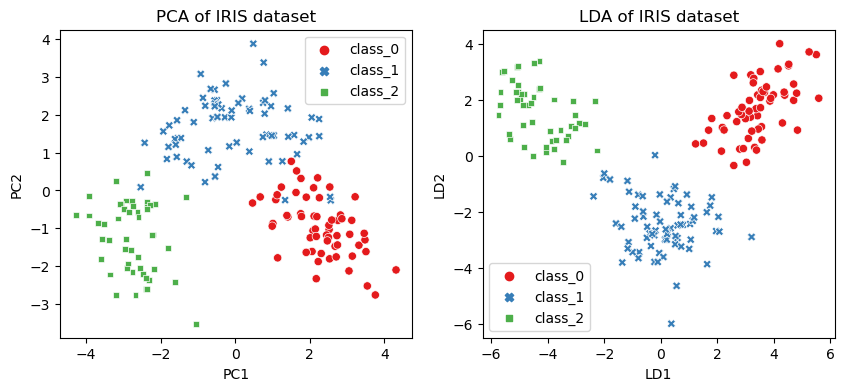

In [7]:
# 시각화 하기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


blank_dict={}
for i in range(len(wine.target_names)):
    blank_dict.update({i:wine.target_names[i]})

    
# Seaborn을 이용하기 위해 궁합이 좋은 dataframe으로 변환
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
y = pd.Series(y).replace(blank_dict)
 # LDA을 통해 y는 array형(0,1,2) 로 표현되었음..

    
# subplot으로 시각화
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# ax: subplot에서의 위치
# hue: 표시색깔_구분기준, style: 표시점모양_구분기준, palette: 색조range
sns.scatterplot(df_pca, x='PC1', y='PC2', hue=y, style=y, ax=ax[0], palette='Set1')
ax[0].set_title('PCA of IRIS dataset') #선형

sns.scatterplot(df_lda, x='LD1', y='LD2', hue=y, style=y, ax=ax[1], palette='Set1')
ax[1].set_title('LDA of IRIS dataset') #lD1축에 직교하는 선

plt.show()  #첫 번째 축의 설명력이 항상 가장 높다!!

# --------------------------------------------------

#### ㉡ Feature Selection: feature 선택; 

#### ㉡-1. Filter: 통계적 방법으로 feature 선택

#### _1. [비지도] 분산 기반 선택 (Variance-based Selection): 분산大 = 설명력高

In [8]:
X = wine.data #.data =feature
y = wine.target #.target =target
X_names=wine.feature_names

from sklearn.feature_selection import VarianceThreshold
vbs = VarianceThreshold(threshold=0.2) # 분산 ≥ 0.2 인 feature 선택

vbs_fitted= vbs.fit(X) 
print(f'{vbs_fitted.variances_ = }') # .variances_: (선택된) feature의 분산

X_vbs_names = [X_names[i] for i in vbs_fitted.get_support(indices=True)]
 # 선택된 array성분의 idx(: .get_support(indices=True))을 통해 new feature naming

X_vbs=vbs_fitted.transform(X)

print(f'{X_vbs_names = }')
print(f'{X_vbs[:5] = }') #행 단위로 묶여서 출력

vbs_fitted.variances_ = array([6.55359730e-01, 1.24100408e+00, 7.48418003e-02, 1.10900306e+01,
       2.02843328e+02, 3.89489032e-01, 9.92113512e-01, 1.54016191e-02,
       3.25754248e-01, 5.34425585e+00, 5.19514497e-02, 5.01254463e-01,
       9.86096010e+04])
X_vbs_names = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'proanthocyanins', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
X_vbs[:5] = array([[1.423e+01, 1.710e+00, 1.560e+01, 1.270e+02, 2.800e+00, 3.060e+00,
        2.290e+00, 5.640e+00, 3.920e+00, 1.065e+03],
       [1.320e+01, 1.780e+00, 1.120e+01, 1.000e+02, 2.650e+00, 2.760e+00,
        1.280e+00, 4.380e+00, 3.400e+00, 1.050e+03],
       [1.316e+01, 2.360e+00, 1.860e+01, 1.010e+02, 2.800e+00, 3.240e+00,
        2.810e+00, 5.680e+00, 3.170e+00, 1.185e+03],
       [1.437e+01, 1.950e+00, 1.680e+01, 1.130e+02, 3.850e+00, 3.490e+00,
        2.180e+00, 7.800e+00, 3.450e+00, 1.480e+03],
       [1.324e+01, 2.590e+00, 2.1

#### _2. [지도] ANOVA F-value:  p-value小 = 설명력高

In [9]:
from sklearn.feature_selection import SelectKBest # k개의 베스트 feature선택
from sklearn.feature_selection import f_classif
fc = SelectKBest(f_classif, k=2)
 #H0: X와 y는 서로 독립적이다.(=설명력, 관계X)
    
fc_fitted = fc.fit(X,y)

X_fc_names = [X_names[i] for i in fc_fitted.get_support(indices=True)]
 # 선택된 array성분의 idx: .get_support(indices=True)

X_fc=fc_fitted.transform(X)


print('< f_classif > \n')
print(f'{X_fc_names =}') #선택된 feature 이름
print(f'{fc_fitted.scores_ = }') #점수가 높을수록 y에 대한 설명력이 높은 feature
print(f'{fc_fitted.pvalues_ = }') #pvalue가 작을수록 H0기각 정도가 커짐

print(f'\n{X_fc[:5] = }') #행 단위로 묶여서 출력

< f_classif > 

X_fc_names =['flavanoids', 'proline']
fc_fitted.scores_ = array([135.07762424,  36.94342496,  13.3129012 ,  35.77163741,
        12.42958434,  93.73300962, 233.92587268,  27.57541715,
        30.27138317, 120.66401844, 101.31679539, 189.97232058,
       207.9203739 ])
fc_fitted.pvalues_ = array([3.31950380e-36, 4.12722880e-14, 4.14996797e-06, 9.44447294e-14,
       8.96339544e-06, 2.13767002e-28, 3.59858583e-50, 3.88804090e-11,
       5.12535874e-12, 1.16200802e-33, 5.91766222e-30, 1.39310496e-44,
       5.78316836e-47])

X_fc[:5] = array([[   3.06, 1065.  ],
       [   2.76, 1050.  ],
       [   3.24, 1185.  ],
       [   3.49, 1480.  ],
       [   2.69,  735.  ]])


#### _3. [지도] F-value 회귀 로 선택

In [10]:
from sklearn.feature_selection import SelectKBest # k개의 베스트 피쳐를 선택
from sklearn.feature_selection import f_regression
fr = SelectKBest(f_regression, k=2)


fr_fitted = fr.fit(X,y)
X_fr_names = [X_names[i] for i in fr_fitted.get_support(indices=True)]
 # 선택된 array성분의 idx: .get_support(indices=True)

X_fr=fr_fitted.transform(X)

print('< f_regression > \n')
print(f'{fr_fitted.scores_ = }') #점수가 높을수록 y에 대한 설명력이 높은 feature
print(f'{fr_fitted.pvalues_ = }') #pvalue가 작을수록 H0기각 정도가 커짐
print(f'{X_fr_names =}') #선택된 feature 이름

print(f'\n{X_fr[:5] = }') #행 단위로 묶여서 출력

< f_regression > 

fr_fitted.scores_ = array([2.12496324e+01, 4.17269323e+01, 4.34814672e-01, 6.44956586e+01,
       8.05344576e+00, 1.88537094e+02, 4.48671871e+02, 5.53438805e+01,
       5.83949501e+01, 1.33652594e+01, 1.08396065e+02, 2.88755043e+02,
       1.18116155e+02])
fr_fitted.pvalues_ = array([7.72325331e-06, 9.91770326e-10, 5.10497750e-01, 1.33539479e-13,
       5.07541577e-03, 1.23405114e-29, 2.73665226e-50, 4.28673904e-12,
       1.32725092e-12, 3.38241649e-04, 4.40539946e-20, 5.88616358e-39,
       2.23131917e-21])
X_fr_names =['flavanoids', 'od280/od315_of_diluted_wines']

X_fr[:5] = array([[3.06, 3.92],
       [2.76, 3.4 ],
       [3.24, 3.17],
       [3.49, 3.45],
       [2.69, 2.93]])


#### _4. [지도] 카이제곱 으로 선택

In [11]:
from sklearn.feature_selection import SelectKBest # k개의 베스트 피쳐를 선택
from sklearn.feature_selection import chi2
c2 = SelectKBest(chi2, k=2)

c2_fitted = c2.fit(X,y)
X_c2_names = [X_names[i] for i in c2_fitted.get_support(indices=True)]
 # 선택된 array성분의 idx: .get_support(indices=True)

X_c2=c2_fitted.transform(X)

print('< chi2 > \n')
print(f'{c2_fitted.scores_ = }') #점수가 높을수록 y에 대한 설명력이 높은 feature
print(f'{c2_fitted.pvalues_ = }') #pvalue가 작을수록 H0기각 정도가 커짐
print(f'{X_c2_names =}') #선택된 feature 이름

print(f'\n{X_c2[:5] = }') #행 단위로 묶여서 출력

< chi2 > 

c2_fitted.scores_ = array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])
c2_fitted.pvalues_ = array([6.56938863e-02, 8.03489047e-07, 6.89567769e-01, 4.16304971e-07,
       1.66972759e-10, 4.05034646e-04, 1.76656548e-14, 4.03433989e-01,
       9.24066398e-03, 2.12488671e-24, 7.49248322e-02, 8.33587826e-06,
       0.00000000e+00])
X_c2_names =['color_intensity', 'proline']

X_c2[:5] = array([[   5.64, 1065.  ],
       [   4.38, 1050.  ],
       [   5.68, 1185.  ],
       [   7.8 , 1480.  ],
       [   4.32,  735.  ]])


#### ㉡-2. Wrapper: algorithm으로 feature 선택

#### _1.[지도] RFE(Recursive Feature Elimination): SVM(SVR/SVC) ~ .ranking=1

In [12]:
#SVM_SVR

from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC, SVR
svc = SVR(kernel="linear", C=len(wine.target_names))
 # SVR: 오차=margin밖, 선형분류
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
 # n_features_to_select =선택할 feature개수
 # step =한 번에 제거할 feature 개수 

rfe_fitted=rfe.fit(X,y)
print('RFE Rank: ', rfe_fitted.ranking_) # rank=1인 feature를 선택해, transform됨

X_rfe = rfe_fitted.transform(X) 
X_rfe_names = [X_names[i] for i in rfe_fitted.get_support(indices=True)]
 # 선택된 array성분의 idx: .get_support(indices=True)

print(f'{X_rfe_names = }')
print(f'{X_rfe[:5] = }')

RFE Rank:  [ 4  9  6  7 11  5  1  2 10  8  1  3 12]
X_rfe_names = ['flavanoids', 'hue']
X_rfe[:5] = array([[3.06, 1.04],
       [2.76, 1.05],
       [3.24, 1.03],
       [3.49, 0.86],
       [2.69, 1.04]])


In [13]:
#SVM_SVC

from sklearn.feature_selection import RFE
from sklearn.svm import SVC, SVR
svc = SVR(kernel="linear", C=len(wine.target_names))
 # SVC: 오차=margin안, 선형분류
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
 # n_features_to_select =선택할 feature개수
 # step =한 번에 제거할 feature 개수 

rfe_fitted=rfe.fit(X,y)
print('RFE Rank: ', rfe_fitted.ranking_) # rank=1인 feature를 선택해, transform됨

X_rfe = rfe_fitted.transform(X) 
X_rfe_names = [X_names[i] for i in rfe_fitted.get_support(indices=True)]
 # 선택된 array성분의 idx: .get_support(indices=True)

print(f'{X_rfe_names = }')
print(f'{X_rfe[:5] = }')

RFE Rank:  [ 4  9  6  7 11  5  1  2 10  8  1  3 12]
X_rfe_names = ['flavanoids', 'hue']
X_rfe[:5] = array([[3.06, 1.04],
       [2.76, 1.05],
       [3.24, 1.03],
       [3.49, 0.86],
       [2.69, 1.04]])


##### ∴ SVR 이나 SVC나 rank=1인 feature는 동일했다.

#### _2.[지도] RFECV(RFE with Cross Validation); 최종 선택될 최적의 feature개수 파악

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC, SVR
rfecv = RFECV(estimator=svc, step=1, cv=3) 
 # step =한 반에 제거할 feature개수
 # cv = 교차검증횟수; 교차검증의 목적: 최종 선택될 최적의 feature개수 파악

rfecv_fitted=rfecv.fit(X, y)
print('RFECV Rank: ', rfecv_fitted.ranking_) # rank=1인 feature를 선택해, transform됨

X_rfecv = rfecv_fitted.transform(X) 
X_rfecv_names = [X_names[i] for i in rfecv_fitted.get_support(indices=True)] 
 # 선택된 array성분의 idx: .get_support(indices=True)

print(f'{X_rfecv_names = }')
print(f'{X_rfecv[:5] = }')

RFECV Rank:  [1 1 1 1 1 1 1 1 1 1 1 1 1]
X_rfecv_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
X_rfecv[:5] = array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e

#### _3.[지도] SFS(Sequential Feature Selector): 전진선택, 후진제거 ; KNN이용

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
 #n_neighbors =판단기준이 되는, 관찰 이웃데이터 개수
sfs = SequentialFeatureSelector(estimator=knn,
                                n_features_to_select=2, direction='backward')
 # n_features_to_select =선택할 feature개수
 # direction = {'forward', 'backward'}: 전진선택, 후진제거


sfs_fitted=sfs.fit(X, y)

X_sfs = sfs_fitted.transform(X) 
X_sfs_names = [X_names[i] for i in sfs_fitted.get_support(indices=True)]
 # 선택된 array성분의 idx: .get_support(indices=True)

print(f'{X_sfs_names = }')
print(f'{X_sfs[:5] = }')

X_sfs_names = ['flavanoids', 'color_intensity']
X_sfs[:5] = array([[3.06, 5.64],
       [2.76, 4.38],
       [3.24, 5.68],
       [3.49, 7.8 ],
       [2.69, 4.32]])


#### ㉡-3. Embedded: algorithm에 모든 feature를 넣은 후 선택

#### _1. [지도] '의사결정나무 기반 알고리즘'

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3) # criterion_default: gini
sfm = SelectFromModel(estimator=clf)

sfm.set_output(transform='pandas') # 모형 구조 확인 및 출력을 pandas로 설정

sfm_fitted=sfm.fit(X, y)
print('SFM threshold: ', sfm_fitted.threshold_) #.threshold_: 중앙값 or 평균

X_sfm = sfm.transform(X) 
X_sfm.columns = [X_names[i] for i in sfm.get_support(indices=True)]
 # 선택된 피쳐들의 이름

X_sfm.head()

SFM threshold:  0.07692307692307693


,flavanoids,od280/od315_of_diluted_wines,proline
0,3.06,3.92,1065.0
1,2.76,3.40,1050.0
2,3.24,3.17,1185.0
3,3.49,3.45,1480.0
4,2.69,2.93,735.0


##### ※ 의사결정나무는 파라미터, 특히 max_depth에 따라 변화가 크다..

# ==============================

### Pipeline: 하나의 처리과정으로 통합

#### ; 여러 개의 추정기(estimator)를 하나의 추정기처럼 사용

#### - 편리함과 캡슐화: fit 과 predict 한 번만 적용하면 됨
#### - 통합된 hyper-parameter: grid search로 한 번에 최적화 가능
#### - 안전성: 일관성유지; 교차검증시 랜덤성에 의한 데이터의 통계적 특성 변화 방지

In [17]:
X=wine.data
y=wine.target

#파이프라인X
from sklearn.feature_selection import SelectKBest, f_classif # feature선택
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
 
# 1)표준화
scaler = StandardScaler()
X=scaler.fit_transform(X)
print('Standard Scaled: \n', X[:5, :])
    
# 2) feature선택 
fc= SelectKBest(f_classif, k=2) #2차원으로 축소
fc_fitted = fc.fit(X, y)
X_fc=fc_fitted.transform(X)
print('Selected features:', fc_fitted.get_feature_names_out())
 #.get_feature_names_out(): 선택된 feature; Xi

# 3) 모델 학습
clf = DecisionTreeClassifier(max_depth=3)
clf_fitted=clf.fit(X_fc, y)
print('Estimate : ', clf_fitted.predict(X_fc)[:3]) #예측치
print('Accuracy : ', clf_fitted.score(X_fc, y)) #정확도

Standard Scaled: 
 [[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]
Selected features: ['x6' 'x12']
Estimate :  [0 0 0]
Accuracy :  0.9269662921348315


#### # Pipeline

In [18]:
#파이프라인O
from sklearn.pipeline import Pipeline # 파이프라인!!

from sklearn.feature_selection import SelectKBest, f_classif # feature선택
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.tree import DecisionTreeClassifier # 의사결정나무


# 0) pipeline 구축: ('단계 이름' : 메소드 )
pipeline = Pipeline([ #실행순서대로 차례로 지정해줘야!!
    ('Standardization', StandardScaler()), ## 1)
    ('Feature_Selection', SelectKBest(f_classif, k=2)), ## 2)
    ('Decision_Tree', DecisionTreeClassifier(max_depth=3)) ## 3)
])
display(pipeline) # 파이프라인 그래프로 구성 확인


# 원본data를 그대로 넣어주면 된다..
pipeline.fit(X, y) ## 모형 학습
print('Estimate : ', pipeline.predict(X)[:3]) # 예측치
print('Accuracy : ', pipeline.score(X, y)) # 정확도

Pipeline(steps=[('Standardization', StandardScaler()),
                ('Feature_Selection', SelectKBest(k=2)),
                ('Decision_Tree', DecisionTreeClassifier(max_depth=3))])

Estimate :  [0 0 0]
Accuracy :  0.9269662921348315


#### # make_pipeline

In [19]:
#make_pipeline: 파이프라인의 이름 자동 생성(=사용자지정 불가)
from sklearn.pipeline import make_pipeline # 파이프라인!!

pipeline_auto = make_pipeline( #Pipeline과 다르게, [ list ] 형식으로 구성하지 않음!!
    StandardScaler(),                   #단계_abs_idx=0          
    SelectKBest(f_classif, k=2),        #단계_abs_idx=1
    DecisionTreeClassifier(max_depth=3) #단계_abs_idx=2
)
display(pipeline_auto) # 파이프라인 그래프로 구성 확인

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest', SelectKBest(k=2)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

#### < pipeline의 내부 결과 확인 >: 2가지 방법!!
##### 1) pipeline.named_steps[' 단계이름 ']: 해당 단계에서 fit된 객체 반환
##### 2) pipeline[ 단계순서_abs_idx ]: 해당 단계에서 fit된 객체 반환

In [20]:
# 아래처럼 'list'로 처리하는 것은 지양하자..
# pipeline.named_steps['Feature_Selection'] == pipeline[0]

print('Selected features:',
      pipeline.named_steps['Feature_Selection'].get_feature_names_out())
 # 1) pipeline.named_steps[' 단계이름 ']: 해당 단계에서 fit된 객체 반환
 # 2) pipeline[ 단계순서_abs_idx ]: 해당 단계에서 fit된 객체 반환

Selected features: ['x6' 'x12']


#### # Pipeline_example

In [21]:
import seaborn as sns
import pandas as pd

dia = sns.load_dataset('diamonds')
dia.info()

X = dia.drop('price', axis=1) # feature
y = dia['price']  # target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [22]:
# feature를 dtype에 따라 분리
num_col = list(X.select_dtypes(exclude='category').columns)
cat_col = list(X.select_dtypes(include='category').columns)

print(f'numeric_col: {num_col}')
print(f'category_col: {cat_col}')

numeric_col: ['carat', 'depth', 'table', 'x', 'y', 'z']
category_col: ['cut', 'color', 'clarity']


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 수치형 data 파이프라인 구축
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # 1) 평균값으로 결측치 대체
        ('scaler', StandardScaler()) # 2) 표준화
])
display(num_pipeline) # 파이프라인 그래프로 구성 확인

# 파이프라인 학습
num_piped = num_pipeline.fit_transform(X[num_col])
pd.DataFrame(num_piped, columns=num_col).head()

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

,carat,depth,table,x,y,z
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#범주형 data 파이프라인 구축
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
          # 1) 'missing'으로 결측치 대체
        ('onehot', OneHotEncoder(sparse_output=False)),
         # 2) Onehotencoder; column개수 증가 주의!!
])
display(cat_pipeline) # 파이프라인 그래프로 구성 확인

# 파이프라인 학습
cat_piped = cat_pipeline.fit_transform(X[cat_col])

# Onehotencoder의 컬럼명을 확인
cat_colnames = cat_pipeline[1].get_feature_names_out()

pd.DataFrame(cat_piped, columns=cat_colnames).head()

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(sparse_output=False))])

,x0_Fair,x0_Good,x0_Ideal,x0_Premium,x0_Very Good,x1_D,x1_E,x1_F,x1_G,x1_H,x1_I,x1_J,x2_I1,x2_IF,x2_SI1,x2_SI2,x2_VS1,x2_VS2,x2_VVS1,x2_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
#dtype 다른 파이프라인 결합: ColumnTransformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

# 파이프라인 합치기: ( '기준이름', 적용pipeline, ['적용할 column명'] ) 
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_col),
        ('category', cat_pipeline, cat_col)
    ])
all_pipe = make_pipeline(
    preprocessor,
    LinearRegression() #dtype 상관없이 거쳐가는 마지막 단계
)
display(all_pipe) # 파이프라인 그래프로 구성 확인

all_pipe.fit(X,y)
print('Estimate : ', all_pipe.predict(X))
print('Accuracy : ', all_pipe.score(X, y)) # =R-squared값 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

Estimate :  [-1346.36428769  -664.59541111   211.10710617 ...  3030.54606309
  2592.82921168  2733.70432005]
Accuracy :  0.9197914950935594
